## Exploratory Data Analysis of the ,,Breast Cancer Coimbra" dataset.
### Link: https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra 

Features:
- Age (years)
- BMI (kg/m2)
- Glucose (mg/dL)
- Insulin (µU/mL)
- HOMA
- Leptin (ng/mL)
- Adiponectin (µg/mL)
- Resistin (ng/mL)
- MCP-1(pg/dL)
Classification -> 1 -> healthy 2-> sick
After change: 
Outcome -> 0 -> healthy, 1 -> sick (64 sick, 52 healthy)

Source:
Miguel Patrício(miguelpatricio '@' gmail.com), José Pereira (jafcpereira '@' gmail.com), Joana Crisóstomo (joanacrisostomo '@' hotmail.com), Paulo Matafome (paulomatafome '@' gmail.com), Raquel Seiça (rmfseica '@' gmail.com), Francisco Caramelo (fcaramelo '@' fmed.uc.pt), all from the Faculty of Medicine of the University of Coimbra and also Manuel Gomes (manuelmgomes '@' gmail.com) from the University Hospital Centre of Coimbra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
# load dataset
bcancer = pd.read_csv('dataR2.csv')
bcancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [3]:
bcancer = bcancer.round(2)
bcancer.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.76,54.68,12.10,10.96,268.23,2
112,62,26.84,100,4.53,1.12,12.45,21.42,7.32,330.16,2
113,65,32.05,97,5.73,1.37,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.57,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.78,90.28,14.11,4.35,90.09,2


### In other datasets '0' is a healthy person, '1' is a sick person, so in this dataset I'm changing labels. I'm also changing the name of column 'Classification' to 'Outcome'.

In [4]:
bcancer.rename(columns={'Classification' : 'Outcome'}, inplace=True)
bcancer.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Outcome
0,48,23.50,70,2.71,0.47,8.81,9.70,8.00,417.11,1
1,83,20.69,92,3.12,0.71,8.84,5.43,4.06,468.79,1
2,82,23.12,91,4.50,1.01,17.94,22.43,9.28,554.70,1
3,68,21.37,77,3.23,0.61,9.88,7.17,12.77,928.22,1
4,86,21.11,92,3.55,0.81,6.70,4.82,10.58,773.92,1


In [5]:
bcancer.Outcome.value_counts() 

Outcome
2    64
1    52
Name: count, dtype: int64

In [6]:
bcancer['Outcome'] = np.where(bcancer['Outcome'] == 1, 0, 1) 
bcancer.Outcome.value_counts()

Outcome
1    64
0    52
Name: count, dtype: int64

In [7]:
bcancer.shape # 116 features, 10 columns

(116, 10)

### Small dataset. 

In [8]:
bcancer.columns.values

array(['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin',
       'Adiponectin', 'Resistin', 'MCP.1', 'Outcome'], dtype=object)

In [ ]:
bcancer.info() # check the data type
# all data is numeric so I don't have to change it

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          116 non-null    int64  
 1   BMI          116 non-null    float64
 2   Glucose      116 non-null    int64  
 3   Insulin      116 non-null    float64
 4   HOMA         116 non-null    float64
 5   Leptin       116 non-null    float64
 6   Adiponectin  116 non-null    float64
 7   Resistin     116 non-null    float64
 8   MCP.1        116 non-null    float64
 9   Outcome      116 non-null    int32  
dtypes: float64(7), int32(1), int64(2)
memory usage: 8.7 KB


In [10]:
bcancer.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,116.0,57.30,16.11,24.00,45.00,56.00,71.00,89.00
BMI,116.0,27.58,5.02,18.37,22.97,27.66,31.24,38.58
Glucose,116.0,97.79,22.53,60.00,85.75,92.00,102.00,201.00
Insulin,116.0,10.01,10.07,2.43,4.36,5.93,11.19,58.46
HOMA,116.0,2.70,3.64,0.47,0.92,1.38,2.86,25.05
Leptin,116.0,26.61,19.18,4.31,12.31,20.27,37.38,90.28
Adiponectin,116.0,10.18,6.84,1.66,5.48,8.35,11.82,38.04
Resistin,116.0,14.73,12.39,3.21,6.88,10.83,17.76,82.10
MCP.1,116.0,534.65,345.91,45.84,269.98,471.33,700.08,1698.44
Outcome,116.0,0.55,0.50,0.00,0.00,1.00,1.00,1.00


### Statistics:
### The oldest woman is 89 years old and the youngest is 24. The highest BMI is 38.58 and the lowest is 18.37. I check the mean, std, maximum and minimum values. Some values (e.g. in Glucose) indicate that there may be outliers. However, on the other hand, a glucose level of 200 may simply indicate diabetes in the patient. A leptin score of 90 is very high. Resistin 82 is also a large deviation and may indicate an error. The MCP.1 score is also too high. Minimum values are probable and do not indicate deviation. I'll check this further, looking for outliers.

In [11]:
bcancer.duplicated().sum()

0

### No duplicates

In [12]:
bcancer.isna().sum()

Age            0
BMI            0
Glucose        0
Insulin        0
HOMA           0
Leptin         0
Adiponectin    0
Resistin       0
MCP.1          0
Outcome        0
dtype: int64

### No missing data.

In [13]:
bcancer.isin({0}).sum()

Age             0
BMI             0
Glucose         0
Insulin         0
HOMA            0
Leptin          0
Adiponectin     0
Resistin        0
MCP.1           0
Outcome        52
dtype: int64

### No null values. There are no missing data. It looks good.

In [14]:
bcancer.nunique()

Age             51
BMI            107
Glucose         50
Insulin        113
HOMA           101
Leptin         114
Adiponectin    110
Resistin       114
MCP.1          113
Outcome          2
dtype: int64

In [15]:
np.sort(bcancer['MCP.1'].unique())

array([  45.84,   63.61,   90.09,   90.6 ,   99.45,  136.85,  165.02,
        174.8 ,  191.72,  193.87,  195.94,  198.4 ,  199.06,  200.98,
        206.8 ,  209.19,  209.75,  215.77,  218.28,  220.66,  225.88,
        232.01,  232.02,  244.75,  252.45,  256.  ,  263.5 ,  268.23,
        269.49,  270.14,  280.69,  293.12,  301.21,  312.  ,  313.73,
        314.05,  318.3 ,  321.92,  330.16,  335.39,  353.57,  354.6 ,
        355.31,  358.62,  359.23,  377.23,  379.  ,  382.96,  392.46,
        395.98,  396.02,  396.65,  407.21,  417.11,  426.18,  444.4 ,
        448.8 ,  468.79,  473.86,  481.95,  483.38,  488.83,  513.66,
        518.59,  530.41,  534.22,  552.44,  554.7 ,  572.4 ,  572.78,
        573.63,  581.31,  585.31,  586.17,  588.46,  602.49,  618.27,
        621.27,  632.22,  634.6 ,  635.05,  638.26,  655.83,  656.39,
        667.93,  695.75,  698.79,  703.97,  713.24,  733.8 ,  737.67,
        738.03,  764.67,  773.92,  775.32,  783.8 ,  788.9 ,  799.9 ,
        806.72,  864

### Statistics:
* Women's age 24-89
* BMI 18.37-38.58
* Glucose 60-201
* Insulin 2.43-58.46
* HOMA 0.47-25.05
* Leptin 4.31-90.28
* Adiponectin 1.66-38.04
* Resistin 3.21-82.1
* MCP-1 45.84-1698.44
* Outcome:
- '0' healthy woman (52)
- '1' sick woman (64)

### Outliers:
* MPC.1 -> value 1698.44,
* Glucose -> high values indicate obesity,
* HOMA -> 20.63, 25.05 high,
* Leptin -> 89.27, 90.28,
* Resistin -> 82.1,
* Insulin -> 58.46.

In [ ]:
bcancer.Outcome.value_counts(normalize = True).round(2) # distribution: 55% are sick women, 45% are healthy women

Outcome
1    0.55
0    0.45
Name: proportion, dtype: float64

[Text(0.5, 1.0, 'Rozkład pacjentów')]

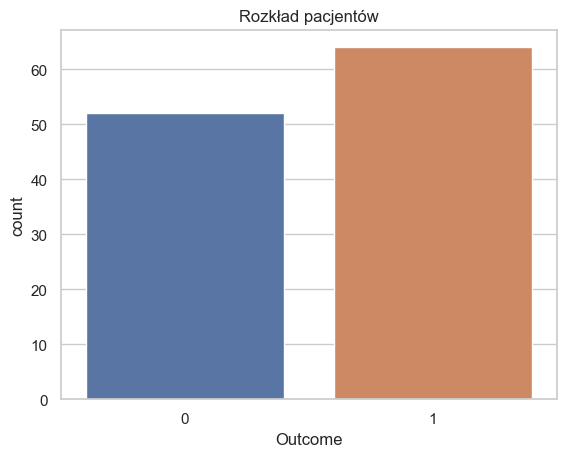

In [17]:
sns.countplot(x = 'Outcome', data = bcancer, dodge=False).set(title='Patient distribution')

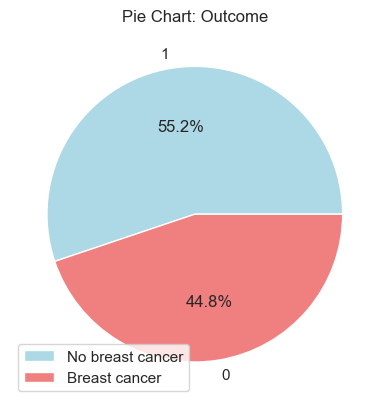

In [18]:
outcome_counts = bcancer['Outcome'].value_counts()
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Pie Chart: Outcome')
legend_labels = ['No breast cancer', 'Breast cancer']
plt.legend(legend_labels, loc='best')

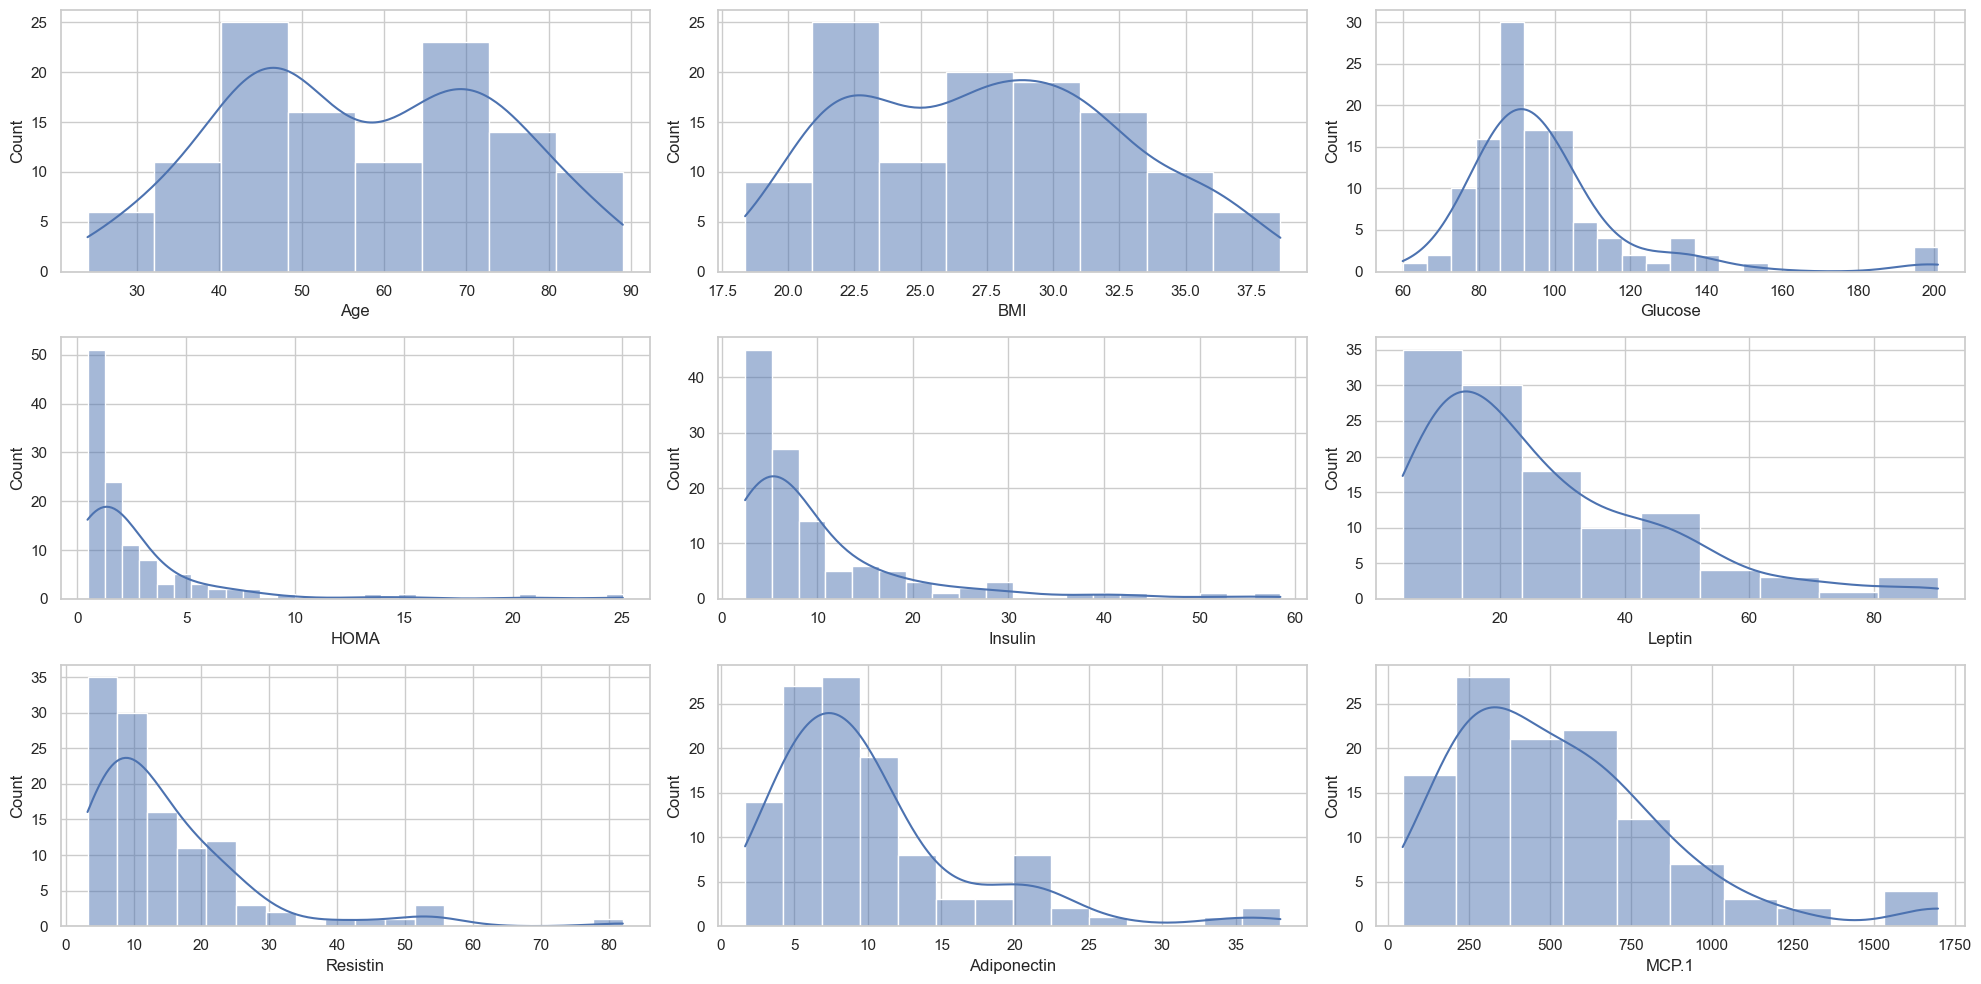

In [19]:
fig, axs = plt.subplots(3, 3, figsize = (20, 10))

sns.histplot(data = bcancer, x = 'Age', kde=True, ax = axs[0, 0])
sns.histplot(data = bcancer, x = 'BMI', kde=True, ax = axs[0, 1])
sns.histplot(data = bcancer, x = 'Glucose', kde=True, ax = axs[0, 2])
sns.histplot(data = bcancer, x = 'Insulin', kde=True, ax = axs[1, 1])
sns.histplot(data = bcancer, x = 'HOMA', kde=True, ax = axs[1, 0])
sns.histplot(data = bcancer, x = 'Leptin', kde=True, ax = axs[1, 2])
sns.histplot(data = bcancer, x = 'Adiponectin', kde=True, ax = axs[2, 1])
sns.histplot(data = bcancer, x = 'Resistin', kde=True, ax = axs[2, 0])
sns.histplot(data = bcancer, x = 'MCP.1', kde=True, ax = axs[2, 2])
plt.tight_layout()

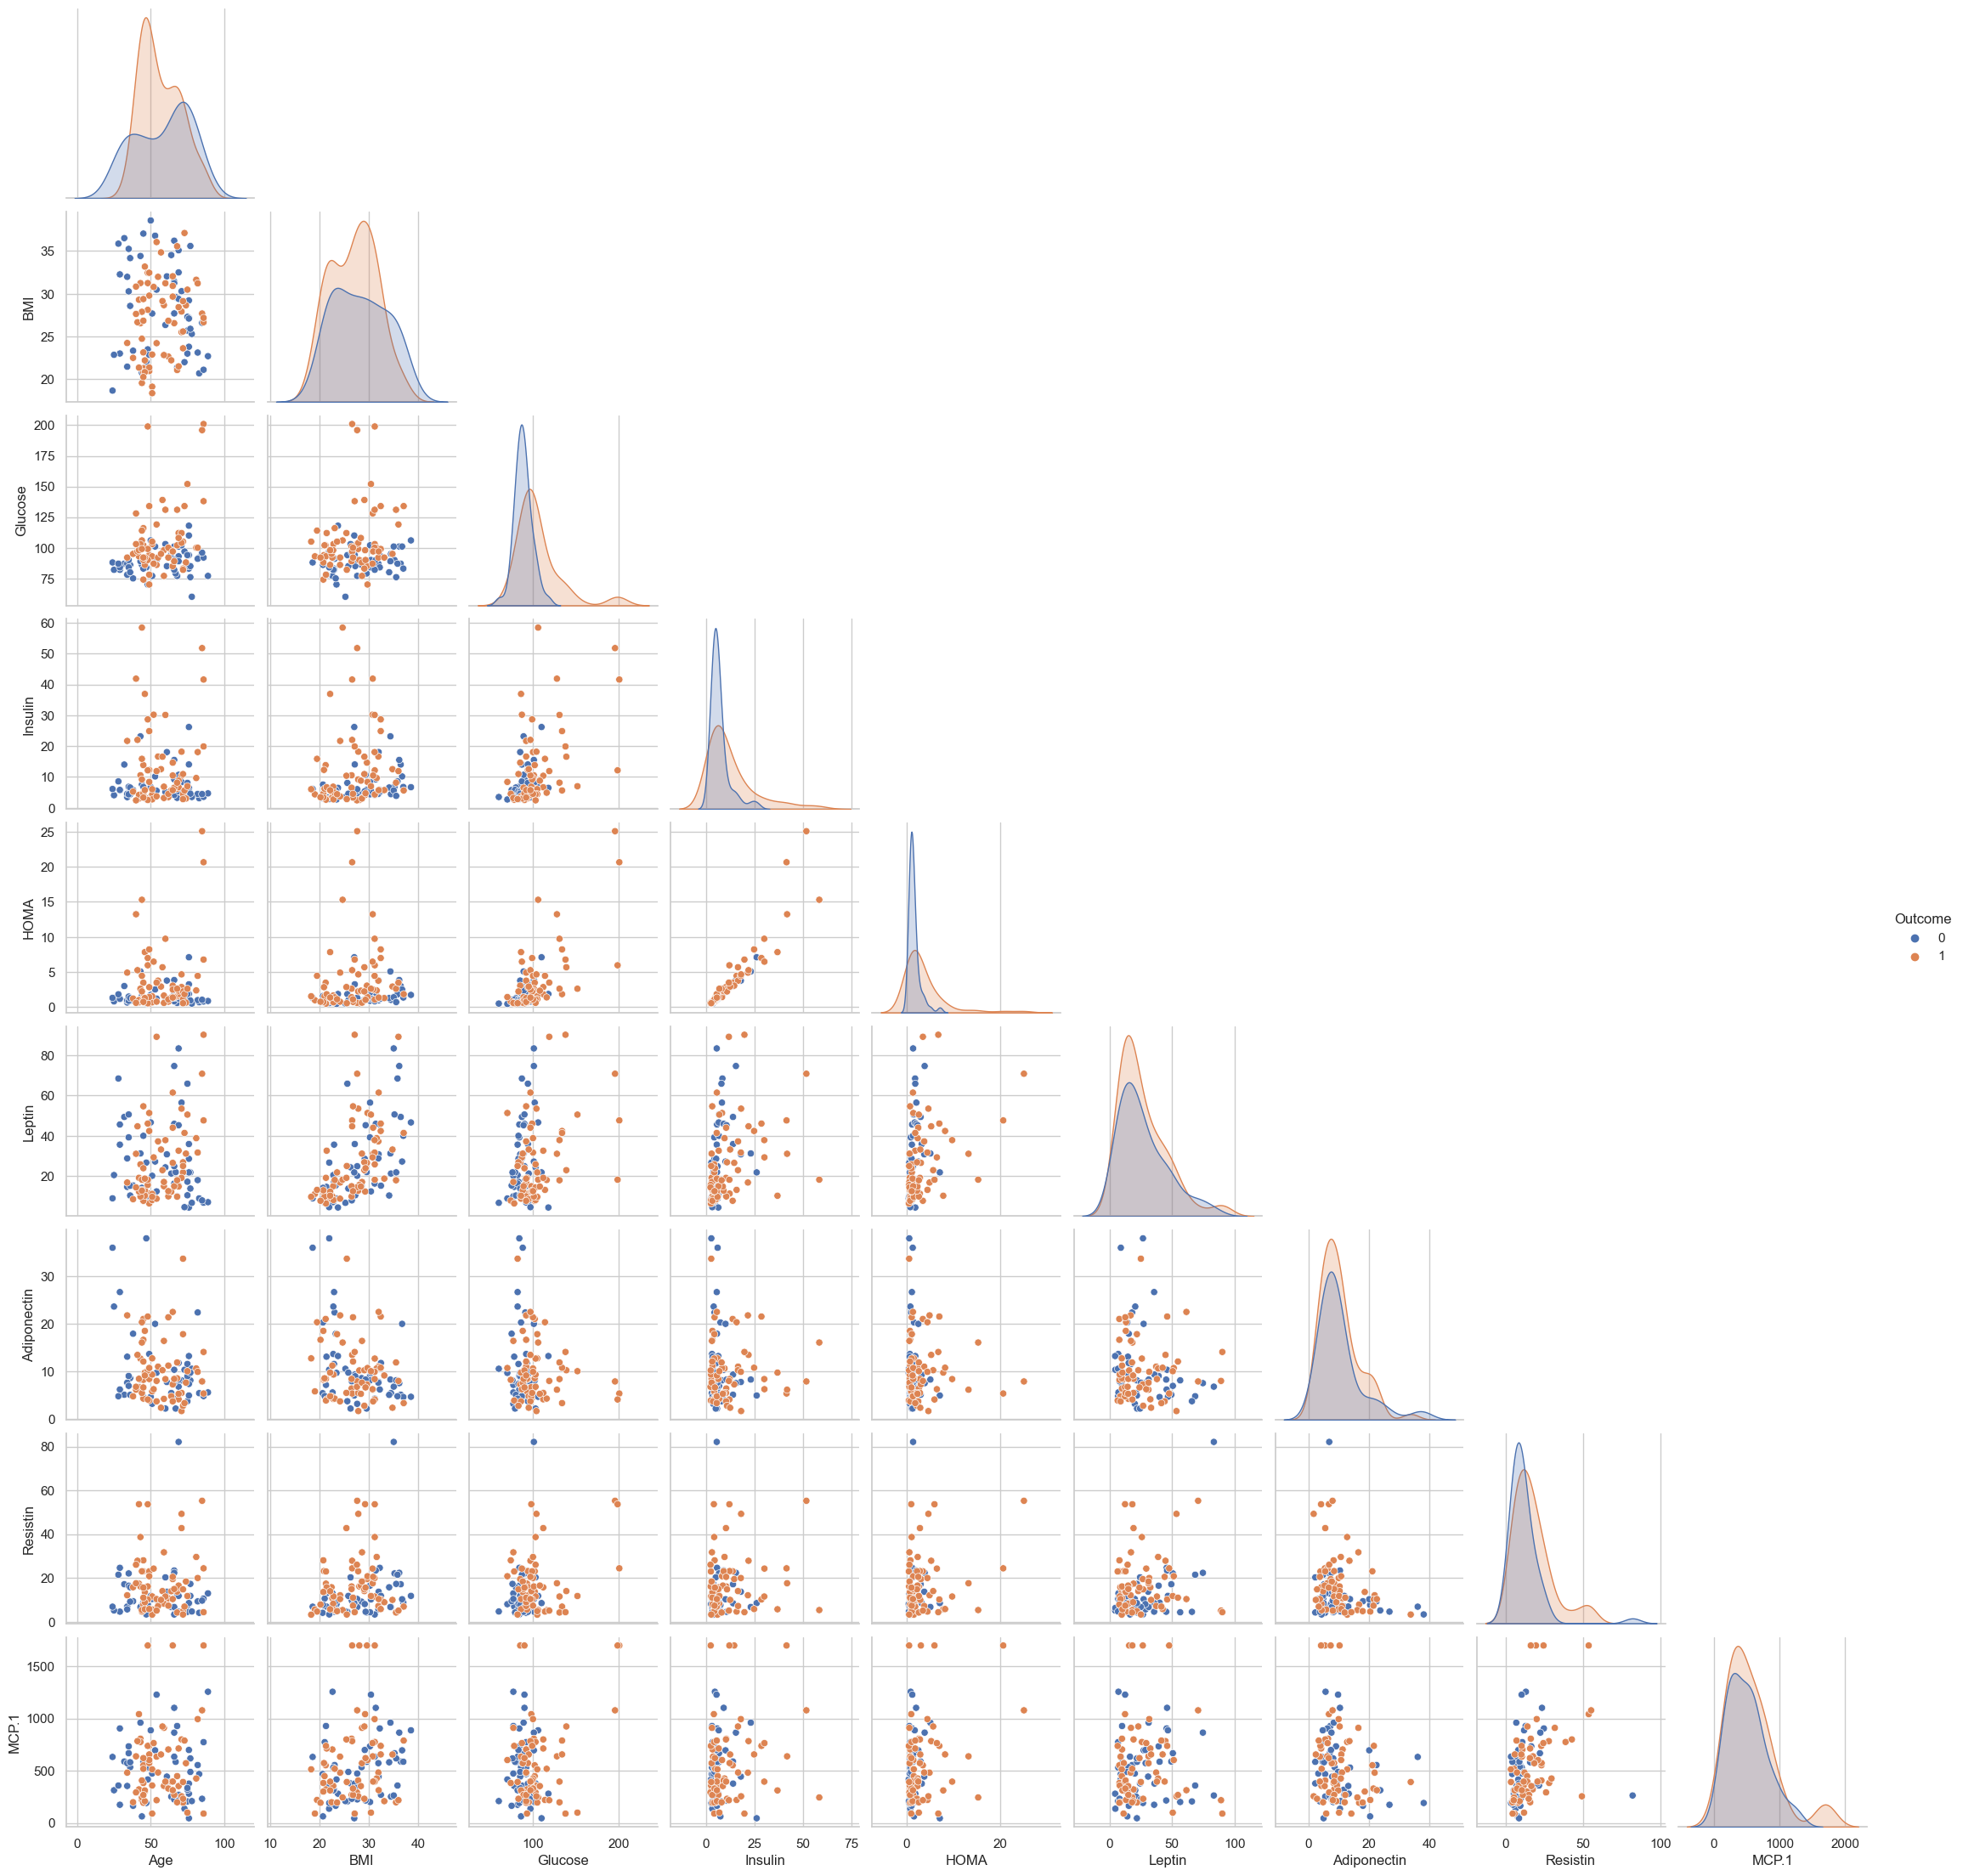

In [20]:
sns.pairplot(data = bcancer, hue = 'Outcome', corner = True, diag_kind = 'kde')

### I check histograms and data distribution to detect outliers.

### I check the correlation between the data.

Text(0.5, 1.0, 'Heatmap correlation')

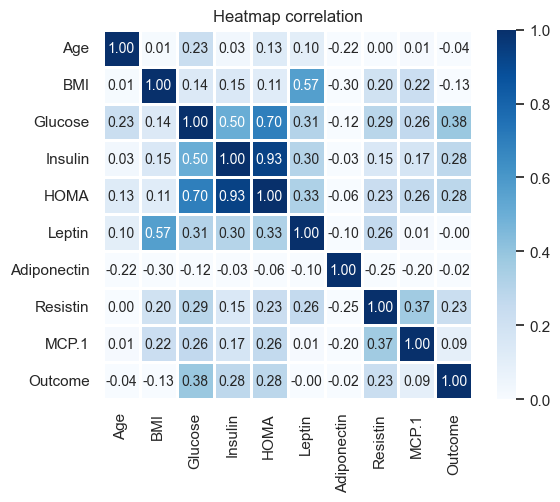

In [21]:
corr = bcancer.corr()
hm = sns.heatmap(corr, annot=True, linewidths=2, fmt='.2f', annot_kws={'size': 10}, vmax=1, vmin=0, square=True, cmap='Blues')
plt.title("Heatmap correlation")

### Correlations: BMI with leptin (0.57), glucose with insulin (0.50), glucose with HOMA (0.70), HOMA with insulin (0.93).

<Axes: xlabel='MCP.1'>

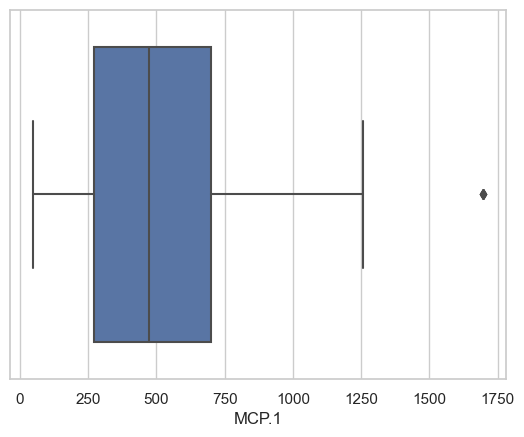

In [22]:
sns.boxplot(data = bcancer, x = 'MCP.1')

In [23]:
bcancer[bcancer['MCP.1'] == 1698.44] # these are results for sick patients, so they are probably not errors

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Outcome
78,86,26.67,201,41.61,20.63,47.65,5.36,24.37,1698.44,1
85,65,29.67,85,14.65,3.07,26.52,7.28,19.46,1698.44,1
86,48,28.12,90,2.54,0.56,15.53,10.22,16.11,1698.44,1
88,48,31.25,199,12.16,5.97,18.13,4.10,53.63,1698.44,1


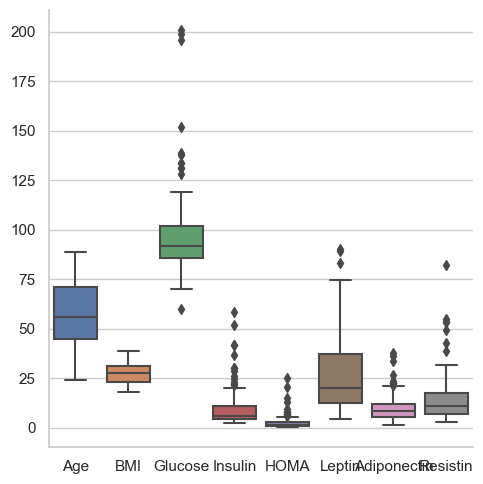

In [24]:
bc1 = bcancer[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin','Adiponectin', 'Resistin']]
sns.catplot(data = bc1, kind = 'box')

### After observing the outliers, I would not remove them. They don't look like errors. Most of the maximum results are for sick patients, so these are values that can tell us that someone is sick. Removing them, would involve the loss of relevant infomation.

In [25]:
bcancer.to_csv('bcancer1.csv', index = False)

### End of data analysis. I'll be modeling later.